In [1]:
# Downloading the dataset
# !pwd
#ls local_training_data/dogs-cats/train
# !ls local_training_data/dogs-cats-small
import os, shutil

In [2]:
import tensorflow as tf

print('-- set gpu')
print("TensorFlow version:", tf.__version__)
print("Num GPUs Available: ", len(tf.config.experimental.list_physical_devices('GPU')))
tf.config.list_physical_devices('GPU')

-- set gpu
TensorFlow version: 2.13.0
Num GPUs Available:  1


[PhysicalDevice(name='/physical_device:GPU:0', device_type='GPU')]

In [3]:
# define dataset dir
original_dataset_dir = 'local_training_data/dogs-cats/train'
base_dir = 'local_training_data/dogs-cats-small'

In [5]:
# make directories
train_dir = os.path.join(base_dir, 'train')
if not os.path.exists(train_dir):
    os.mkdir(train_dir)
print('train_dir:', train_dir)

validation_dir = os.path.join(base_dir, 'validation')
if not os.path.exists(validation_dir):
    os.mkdir(validation_dir)
print('validation_dir:', validation_dir)

test_dir = os.path.join(base_dir, 'test')
if not os.path.exists(test_dir):
    os.mkdir(test_dir)
print('test_dir:', test_dir)

train_cats_dir = os.path.join(train_dir, 'cats')
if not os.path.exists(train_cats_dir):
    os.mkdir(train_cats_dir)
print('train_cats_dir:', train_cats_dir)

train_dogs_dir = os.path.join(train_dir, 'dogs')
if not os.path.exists(train_dogs_dir):
    os.mkdir(train_dogs_dir)
print('train_dogs_dir:', train_dogs_dir)

validation_cats_dir = os.path.join(validation_dir, 'cats')
if not os.path.exists(validation_cats_dir):
    os.mkdir(validation_cats_dir)
print('validation_cats_dir:', validation_cats_dir)

validation_dogs_dir = os.path.join(validation_dir, 'dogs')
if not os.path.exists(validation_dogs_dir):
    os.mkdir(validation_dogs_dir)
print('validation_dogs_dir:', validation_dogs_dir)

test_cats_dir = os.path.join(test_dir, 'cats')
if not os.path.exists(test_cats_dir):
    os.mkdir(test_cats_dir)
print('test_cats_dir:', test_cats_dir)

test_dogs_dir = os.path.join(test_dir, 'dogs')
if not os.path.exists(test_dogs_dir):
    os.mkdir(test_dogs_dir)
print('test_dogs_dir:', test_dogs_dir)

train_dir: local_training_data/dogs-cats-small/train
validation_dir: local_training_data/dogs-cats-small/validation
test_dir: local_training_data/dogs-cats-small/test
train_cats_dir: local_training_data/dogs-cats-small/train/cats
train_dogs_dir: local_training_data/dogs-cats-small/train/dogs
validation_cats_dir: local_training_data/dogs-cats-small/validation/cats
validation_dogs_dir: local_training_data/dogs-cats-small/validation/dogs
test_cats_dir: local_training_data/dogs-cats-small/test/cats
test_dogs_dir: local_training_data/dogs-cats-small/test/dogs


In [6]:
# Copies the first 1,000 cat images to train_cats_dir
fnames = ['cat.{}.jpg'.format(i) for i in range(2000)]
for fname in fnames:
    src = os.path.join(original_dataset_dir, fname)
    dst = os.path.join(train_cats_dir, fname)
    shutil.copyfile(src, dst)

In [7]:
# Copies the next 500 cat images to validation_cats_dir
fnames = ['cat.{}.jpg'.format(i) for i in range(2000, 2500)]
for fname in fnames:
    src = os.path.join(original_dataset_dir, fname)
    dst = os.path.join(validation_cats_dir, fname)
    shutil.copyfile(src, dst)

In [8]:
# Copies the next 500 cat images to test_cats_dir
fnames = ['cat.{}.jpg'.format(i) for i in range(2500, 3000)]
for fname in fnames:
    src = os.path.join(original_dataset_dir, fname)
    dst = os.path.join(test_cats_dir, fname)
    shutil.copyfile(src, dst)

In [9]:
# Copies the first 1,000 dog images to train_dogs_dir
fnames = ['dog.{}.jpg'.format(i) for i in range(2000)]
for fname in fnames:
    src = os.path.join(original_dataset_dir, fname)
    dst = os.path.join(train_dogs_dir, fname)
    shutil.copyfile(src, dst)

In [10]:
# Copies the next 500 dog images to validation_dogs_dir
fnames = ['dog.{}.jpg'.format(i) for i in range(2000, 2500)]
for fname in fnames:
    src = os.path.join(original_dataset_dir, fname)
    dst = os.path.join(validation_dogs_dir, fname)
    shutil.copyfile(src, dst)

In [11]:
# Copies the next 500 dog images to test_dogs_dir
fnames = ['dog.{}.jpg'.format(i) for i in range(2500, 3000)]
for fname in fnames:
    src = os.path.join(original_dataset_dir, fname)
    dst = os.path.join(test_dogs_dir, fname)
    shutil.copyfile(src, dst)

In [12]:
# do sanity check
print('total training cat images:', len(os.listdir(train_cats_dir)))
print('total training dog images:', len(os.listdir(train_dogs_dir)))
print('total validation cat images:', len(os.listdir(validation_cats_dir)))
print('total validation dog images:', len(os.listdir(validation_dogs_dir)))
print('total test cat images:', len(os.listdir(test_cats_dir)))
print('total test dog images:', len(os.listdir(test_dogs_dir)))

total training cat images: 2000
total training dog images: 2000
total validation cat images: 500
total validation dog images: 500
total test cat images: 500
total test dog images: 500


In [13]:
# Building your network
from keras import layers
from keras import models

# define the model
model = models.Sequential()
model.add(layers.Conv2D(32, (3, 3), activation='relu', input_shape=(150, 150, 3)))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(128, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(128, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Flatten())
model.add(layers.Dense(512, activation='relu'))
model.add(layers.Dense(1, activation='sigmoid'))

# summary
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 148, 148, 32)      896       
                                                                 
 max_pooling2d (MaxPooling2  (None, 74, 74, 32)        0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 72, 72, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 36, 36, 64)        0         
 g2D)                                                            
                                                                 
 conv2d_2 (Conv2D)           (None, 34, 34, 128)       73856     
                                                                 
 max_pooling2d_2 (MaxPoolin  (None, 17, 17, 128)       0

2023-10-10 12:35:30.309142: I metal_plugin/src/device/metal_device.cc:1154] Metal device set to: Apple M1 Pro
2023-10-10 12:35:30.309241: I metal_plugin/src/device/metal_device.cc:296] systemMemory: 16.00 GB
2023-10-10 12:35:30.309253: I metal_plugin/src/device/metal_device.cc:313] maxCacheSize: 5.33 GB
2023-10-10 12:35:30.309760: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:303] Could not identify NUMA node of platform GPU ID 0, defaulting to 0. Your kernel may not have been built with NUMA support.
2023-10-10 12:35:30.310100: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:269] Created TensorFlow device (/job:localhost/replica:0/task:0/device:GPU:0 with 0 MB memory) -> physical PluggableDevice (device: 0, name: METAL, pci bus id: <undefined>)


In [14]:
# compile the model
from keras import optimizers

model.compile(loss='binary_crossentropy',
              optimizer=optimizers.RMSprop(lr=1e-4),
              metrics=['acc'])

In [15]:
# Data preprocessing
# ImageDataGenerator to read images from directories
from keras.preprocessing.image import ImageDataGenerator

# create data generator
# rescales all images by 1/255
train_datagen = ImageDataGenerator(rescale=1./255)
test_datagen = ImageDataGenerator(rescale=1./255)

train_generator = train_datagen.flow_from_directory(
    train_dir, # target directory
    target_size=(150, 150), # Resizes all images to 150 × 150
    batch_size=20,
    class_mode='binary')

validation_generator = test_datagen.flow_from_directory(
    validation_dir,
    target_size=(150, 150),
    batch_size=20,
    class_mode='binary')

Found 4000 images belonging to 2 classes.
Found 1000 images belonging to 2 classes.


In [16]:
# test generator
for data_batch, labels_batch in train_generator:
    print('data batch shape:', data_batch.shape)
    print('labels batch shape:', labels_batch.shape)
    break

data batch shape: (20, 150, 150, 3)
labels batch shape: (20,)


In [17]:
# fit the model
# calculate: steps_per_epoch => number of batches fetched
# batches = 20 samples, steps_per_epoch/batches = 100, then  2,000 samples
# steps_per_epoch = total_samples / batch_size
history = model.fit(
    train_generator,
    steps_per_epoch=200,
    epochs=30,
    validation_data=validation_generator,
    validation_steps=50)

Epoch 1/30


2023-10-11 06:35:39.642129: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


200/200 [==============================] - ETA: 0s - loss: 0.8029 - acc: 0.5478

2023-10-11 06:35:46.004043: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


200/200 [==============================] - 8s 37ms/step - loss: 0.8029 - acc: 0.5478 - val_loss: 0.6500 - val_acc: 0.6610
Epoch 2/30
200/200 [==============================] - 7s 34ms/step - loss: 0.6481 - acc: 0.6475 - val_loss: 0.5847 - val_acc: 0.6870
Epoch 3/30
200/200 [==============================] - 7s 32ms/step - loss: 0.6085 - acc: 0.7013 - val_loss: 0.5827 - val_acc: 0.7030
Epoch 4/30
200/200 [==============================] - 6s 30ms/step - loss: 0.5669 - acc: 0.7268 - val_loss: 0.5339 - val_acc: 0.7280
Epoch 5/30
200/200 [==============================] - 6s 30ms/step - loss: 0.5659 - acc: 0.7393 - val_loss: 0.5276 - val_acc: 0.7450
Epoch 6/30
200/200 [==============================] - 6s 30ms/step - loss: 0.6087 - acc: 0.7328 - val_loss: 0.5457 - val_acc: 0.7410
Epoch 7/30
200/200 [==============================] - 6s 30ms/step - loss: 0.5688 - acc: 0.7515 - val_loss: 0.8850 - val_acc: 0.6510
Epoch 8/30
200/200 [==============================] - 6s 30ms/step - loss: 0.659

In [18]:
model.save('trained_models/cats_and_dogs_small_1.h5')

/Users/jcolamendy/python/ml-tutorials/venv/lib/python3.9/site-packages/keras/src/engine/training.py:3000: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


In [19]:
import matplotlib.pyplot as plt

history.history.keys()

dict_keys(['loss', 'acc', 'val_loss', 'val_acc'])

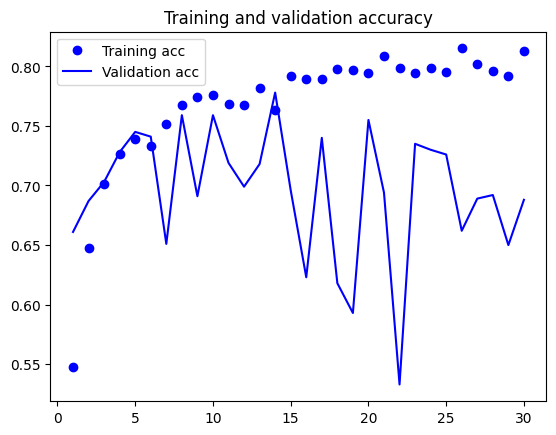

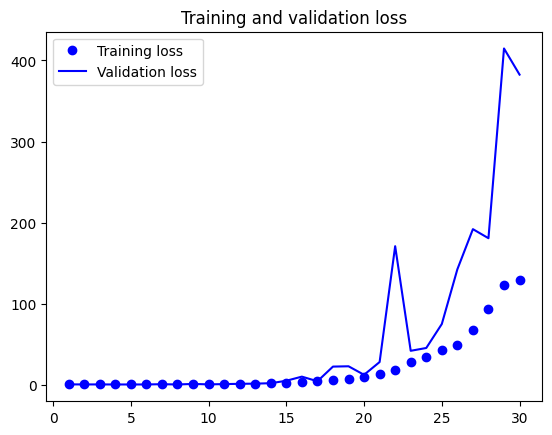

In [20]:
acc = history.history['acc']
val_acc = history.history['val_acc']

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(1, len(acc) + 1)

plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()
plt.figure()

plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()

# The training accuracy increases linearly over time, until it reaches nearly 100%, whereas the validation accuracy stalls at 70–72%.
# The validation loss reaches its minimum after only five epochs and then stalls, whereas the training loss keeps decreasing linearly until it reaches nearly 0.

In [38]:
# Using data augmentation
# Overfitting is caused by having too few samples to learn from, rendering you unable to train a model that can generalize to new data.
# Data augmentation takes the approach of generating more training data from existing training samples,
# by augmenting the samples via a number of random transformations that yield believable-looking images.

# In Keras, this can be done by configuring a number of random transformations to be performed on the images read by the ImageDataGenerator

In [21]:
# defining a new convnet that includes dropout
model = models.Sequential()
model.add(layers.Conv2D(32, (3, 3), activation='relu', input_shape=(150, 150, 3)))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(128, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(128, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Flatten())
model.add(layers.Dropout(0.5))
model.add(layers.Dense(512, activation='relu'))
model.add(layers.Dense(1, activation='sigmoid'))

model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_4 (Conv2D)           (None, 148, 148, 32)      896       
                                                                 
 max_pooling2d_4 (MaxPoolin  (None, 74, 74, 32)        0         
 g2D)                                                            
                                                                 
 conv2d_5 (Conv2D)           (None, 72, 72, 64)        18496     
                                                                 
 max_pooling2d_5 (MaxPoolin  (None, 36, 36, 64)        0         
 g2D)                                                            
                                                                 
 conv2d_6 (Conv2D)           (None, 34, 34, 128)       73856     
                                                                 
 max_pooling2d_6 (MaxPoolin  (None, 17, 17, 128)      

In [22]:
model.compile(loss='binary_crossentropy',
              optimizer=optimizers.RMSprop(lr=1e-4),
              metrics=['acc'])

In [23]:
# Training the convnet using data-augmentation generators
train_datagen = ImageDataGenerator(
    rescale=1./255,
    rotation_range=40,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
)

test_datagen = ImageDataGenerator(rescale=1./255)

In [24]:
train_generator = train_datagen.flow_from_directory(
    train_dir,
    target_size=(150, 150),
    batch_size=20,
    class_mode='binary',
)

validation_generator = test_datagen.flow_from_directory(
    validation_dir,
    target_size=(150, 150),
    batch_size=20,
    class_mode='binary',
)

Found 4000 images belonging to 2 classes.
Found 1000 images belonging to 2 classes.


In [25]:
# train using data augmentation
history = model.fit(
    train_generator,
    steps_per_epoch=200,
    epochs=100,
    validation_data=validation_generator,
    validation_steps=50,
)

Epoch 1/100


2023-10-11 06:53:13.380768: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


200/200 [==============================] - ETA: 0s - loss: 0.7491 - acc: 0.5133

2023-10-11 06:53:26.789225: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


200/200 [==============================] - 15s 72ms/step - loss: 0.7491 - acc: 0.5133 - val_loss: 0.6880 - val_acc: 0.5480
Epoch 2/100
200/200 [==============================] - 14s 69ms/step - loss: 0.6923 - acc: 0.5513 - val_loss: 1.8606 - val_acc: 0.5010
Epoch 3/100
200/200 [==============================] - 14s 70ms/step - loss: 0.6676 - acc: 0.6108 - val_loss: 0.6258 - val_acc: 0.6560
Epoch 4/100
200/200 [==============================] - 14s 70ms/step - loss: 0.6507 - acc: 0.6275 - val_loss: 0.6234 - val_acc: 0.6880
Epoch 5/100
200/200 [==============================] - 14s 72ms/step - loss: 0.6522 - acc: 0.6323 - val_loss: 0.5873 - val_acc: 0.6830
Epoch 6/100
200/200 [==============================] - 14s 69ms/step - loss: 0.6372 - acc: 0.6540 - val_loss: 0.6840 - val_acc: 0.5510
Epoch 7/100
200/200 [==============================] - 13s 65ms/step - loss: 0.6367 - acc: 0.6440 - val_loss: 0.6060 - val_acc: 0.6270
Epoch 8/100
200/200 [==============================] - 13s 66ms/ste

In [26]:
model.save('trained_models/cats_and_dogs_small_2.h5')

/Users/jcolamendy/python/ml-tutorials/venv/lib/python3.9/site-packages/keras/src/engine/training.py:3000: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


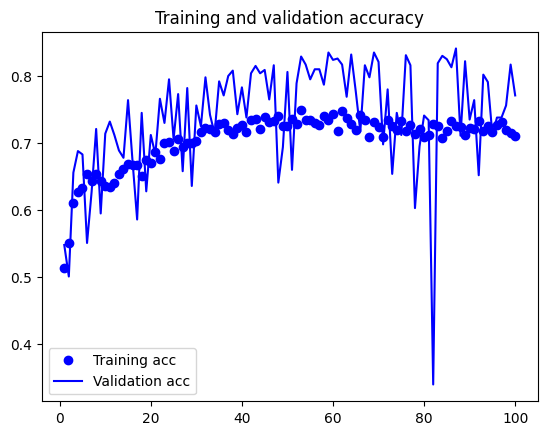

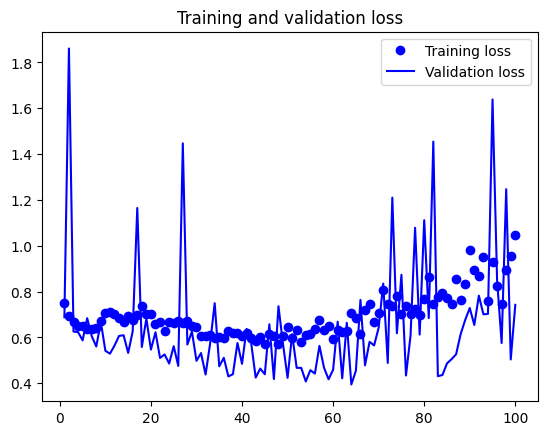

In [27]:
acc = history.history['acc']
val_acc = history.history['val_acc']

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(1, len(acc) + 1)

plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()
plt.figure()

plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()

In [46]:
# Using a pretrained convnet - feature extraction
# Feature extraction consists of taking the convolutional base of a previously trained network
# running the new data through it, and training a new classifier on top of the output
# Use the convolutional base of the VGG16 network, trained on ImageNet, to extract interesting features from cat and dog images, 
# and then train a dogs-versus-cats classifier on top of these features

In [28]:
# Instantiating the VGG16 convolutional base
from keras.applications import VGG16

conv_base = VGG16(weights='imagenet', # specifies the weight checkpoint from which to initialize the model
              include_top=False, # refers to including (or not) the densely connected classifier on top of the network
              input_shape=(150, 150, 3), # shape of the image tensors that you’ll feed to the network
)

In [29]:
conv_base.summary()
# The final feature map has shape (4, 4, 512)

Model: "vgg16"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 150, 150, 3)]     0         
                                                                 
 block1_conv1 (Conv2D)       (None, 150, 150, 64)      1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 150, 150, 64)      36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 75, 75, 64)        0         
                                                                 
 block2_conv1 (Conv2D)       (None, 75, 75, 128)       73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 75, 75, 128)       147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, 37, 37, 128)       0     

In [49]:
# pretrained convnet - feature extraction without data augmentation

In [30]:
# imports
import numpy as np

datagen = ImageDataGenerator(rescale=1./255)
batch_size = 20

def extract_features(directory, sample_count):
    # init
    features = np.zeros(shape=(sample_count, 4, 4, 512))
    labels = np.zeros(shape=(sample_count))
    generator = datagen.flow_from_directory(directory, target_size=(150, 150), batch_size=batch_size, class_mode='binary')
    i=0
    # logic
    for inputs_batch, labels_batch in generator:
        features_batch = conv_base.predict(inputs_batch)
        features[i * batch_size : (i + 1) * batch_size] = features_batch
        labels[i * batch_size : (i + 1) * batch_size] = labels_batch
        i += 1
        if i * batch_size >= sample_count:
            break
    # result
    return features, labels

In [31]:
train_features, train_labels = extract_features(train_dir, 4000)
validation_features, validation_labels = extract_features(validation_dir, 1000)
test_features, test_labels = extract_features(test_dir, 1000)

Found 4000 images belonging to 2 classes.
1/1 [==============================] - 0s 143ms/step


2023-10-11 08:06:12.423807: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


1/1 [==============================] - 0s 10ms/step
Found 1000 images belonging to 2 classes.
1/1 [==============================] - 0s 9ms/step
Found 1000 images belonging to 2 classes.
1/1 [==============================] - 0s 9ms/step


In [33]:
train_features.shape

(4000, 4, 4, 512)

In [34]:
res = train_features[0:2]
res.shape

(2, 4, 4, 512)

In [35]:
res = train_features[0]
res.shape

(4, 4, 512)

In [41]:
train_labels.shape

(4000,)

In [42]:
train_labels[:10]

array([0., 1., 0., 1., 1., 1., 0., 0., 0., 0.])

In [36]:
train_features = np.reshape(train_features, (4000, 4 * 4 * 512))
validation_features = np.reshape(validation_features, (1000, 4 * 4 * 512))
test_features = np.reshape(test_features, (1000, 4 * 4 * 512))

In [37]:
train_features.shape

(4000, 8192)

In [38]:
# At this point, you can define your densely connected classifier (note the use of drop- out for regularization) 
# and train it on the data and labels that you just recorded.
from keras import models
from keras import layers
from keras import optimizers

model = models.Sequential()
model.add(layers.Dense(256, activation='relu', input_dim=4 * 4 * 512))
model.add(layers.Dropout(0.5))
model.add(layers.Dense(1, activation='sigmoid'))

In [39]:
model.compile(optimizer=optimizers.RMSprop(lr=2e-5),
              loss='binary_crossentropy',
              metrics=['acc'])

In [40]:
# train the model
history = model.fit(train_features, train_labels,
                    epochs=30,
                    batch_size=20,
                    validation_data=(validation_features, validation_labels))

Epoch 1/30
  7/200 [>.............................] - ETA: 1s - loss: 4.3257 - acc: 0.5071  

2023-10-11 08:14:43.087469: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


200/200 [==============================] - 2s 8ms/step - loss: 0.6850 - acc: 0.8023 - val_loss: 0.3039 - val_acc: 0.8750
Epoch 2/30
  1/200 [..............................] - ETA: 1s - loss: 0.2046 - acc: 0.9500

2023-10-11 08:14:44.556045: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


200/200 [==============================] - 1s 7ms/step - loss: 0.3560 - acc: 0.8715 - val_loss: 0.4897 - val_acc: 0.8230
Epoch 3/30
200/200 [==============================] - 1s 7ms/step - loss: 0.2936 - acc: 0.8883 - val_loss: 0.2926 - val_acc: 0.8830
Epoch 4/30
200/200 [==============================] - 1s 7ms/step - loss: 0.2633 - acc: 0.9020 - val_loss: 0.4310 - val_acc: 0.8660
Epoch 5/30
200/200 [==============================] - 1s 7ms/step - loss: 0.2503 - acc: 0.9110 - val_loss: 0.3300 - val_acc: 0.8760
Epoch 6/30
200/200 [==============================] - 1s 7ms/step - loss: 0.2174 - acc: 0.9155 - val_loss: 0.4578 - val_acc: 0.8650
Epoch 7/30
200/200 [==============================] - 1s 7ms/step - loss: 0.2021 - acc: 0.9263 - val_loss: 0.3658 - val_acc: 0.8790
Epoch 8/30
200/200 [==============================] - 1s 7ms/step - loss: 0.1828 - acc: 0.9330 - val_loss: 0.3138 - val_acc: 0.8870
Epoch 9/30
200/200 [==============================] - 1s 7ms/step - loss: 0.1679 - acc:

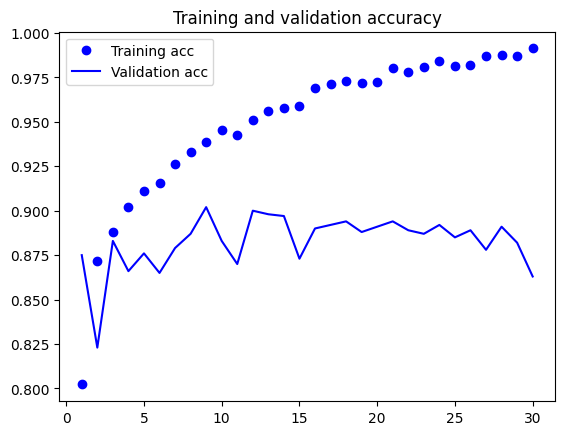

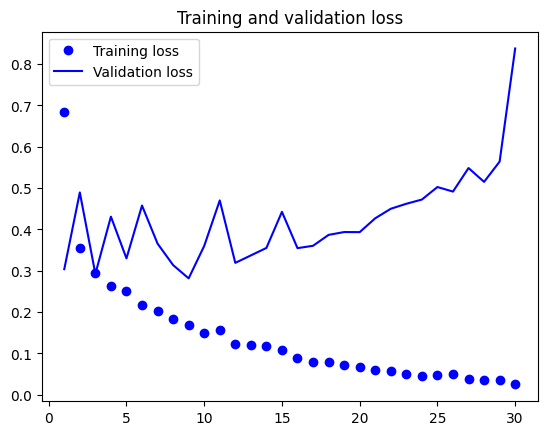

In [43]:
# plotting the results
import matplotlib.pyplot as plt

acc = history.history['acc']
val_acc = history.history['val_acc']

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(1, len(acc) + 1)

plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()
plt.figure()

plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()

# Notes:
# - You reach a validation accuracy of about 90%
# - But the plots also indicate that you’re overfitting almost from the start
# - That’s because this technique doesn’t use data augmentation, which is essential for preventing overfitting with small image datasets.

In [ ]:
# pretrained convnet - feature extraction with data augmentation
# extend the conv_base model and running it end to end on the inputs
# Note:
# - this technique is so expensive that you should only attempt it if you have access to a GPU—it’s absolutely intractable on CPU

In [44]:
# add a model (like conv_base) to a Sequential model just like you would add a layer
from keras import models
from keras import layers

model = models.Sequential()
model.add(conv_base)
model.add(layers.Flatten())
model.add(layers.Dense(256, activation='relu'))
model.add(layers.Dense(1, activation='sigmoid'))

In [45]:
model.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 vgg16 (Functional)          (None, 4, 4, 512)         14714688  
                                                                 
 flatten_2 (Flatten)         (None, 8192)              0         
                                                                 
 dense_6 (Dense)             (None, 256)               2097408   
                                                                 
 dense_7 (Dense)             (None, 1)                 257       
                                                                 
Total params: 16812353 (64.13 MB)
Trainable params: 16812353 (64.13 MB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [46]:
# Before you compile and train the model, need to to freeze the convolu- tional base.
# Freezing a layer or set of layers means preventing their weights from being updated during training.
# In Keras, you freeze a network by setting its trainable attribute to False.
print('This is the number of trainable weights '
      'before freezing the conv base:', len(model.trainable_weights))
conv_base.trainable = False
print('This is the number of trainable weights '
      'before freezing the conv base:', len(model.trainable_weights))

This is the number of trainable weights before freezing the conv base: 30
This is the number of trainable weights before freezing the conv base: 4


In [47]:
# Note that in order for these changes to take effect, you must first compile the model.
model.compile(loss='binary_crossentropy',
              optimizer=optimizers.RMSprop(lr=2e-5),
              metrics=['acc'])

In [48]:
# define data generators
train_datagen = ImageDataGenerator(
      rescale=1./255,
      rotation_range=40,
      width_shift_range=0.2,
      height_shift_range=0.2,
      shear_range=0.2,
      zoom_range=0.2,
      horizontal_flip=True,
      fill_mode='nearest')

test_datagen = ImageDataGenerator(rescale=1./255)

In [49]:
# create generators
train_generator = train_datagen.flow_from_directory(train_dir,
                                                    target_size=(150, 150),
                                                    batch_size=20,
                                                    class_mode='binary')

validation_generator = test_datagen.flow_from_directory(validation_dir,
                                                        target_size=(150, 150),
                                                        batch_size=20,
                                                        class_mode='binary')

Found 4000 images belonging to 2 classes.
Found 1000 images belonging to 2 classes.


In [50]:
# train
history = model.fit(
      train_generator,
      steps_per_epoch=200,
      epochs=30,
      validation_data=validation_generator,
      validation_steps=50)

Epoch 1/30


2023-10-11 08:21:32.237963: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


200/200 [==============================] - ETA: 0s - loss: 0.7340 - acc: 0.7463

2023-10-11 08:21:45.799181: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


200/200 [==============================] - 17s 82ms/step - loss: 0.7340 - acc: 0.7463 - val_loss: 0.6683 - val_acc: 0.7670
Epoch 2/30
200/200 [==============================] - 16s 79ms/step - loss: 0.4221 - acc: 0.8163 - val_loss: 0.2944 - val_acc: 0.8740
Epoch 3/30
200/200 [==============================] - 16s 81ms/step - loss: 0.4161 - acc: 0.8190 - val_loss: 0.2757 - val_acc: 0.8850
Epoch 4/30
200/200 [==============================] - 16s 81ms/step - loss: 0.4086 - acc: 0.8200 - val_loss: 0.2719 - val_acc: 0.8810
Epoch 5/30
200/200 [==============================] - 16s 79ms/step - loss: 0.4063 - acc: 0.8183 - val_loss: 0.4310 - val_acc: 0.8320
Epoch 6/30
200/200 [==============================] - 16s 79ms/step - loss: 0.3881 - acc: 0.8263 - val_loss: 0.2786 - val_acc: 0.8770
Epoch 7/30
200/200 [==============================] - 16s 81ms/step - loss: 0.3688 - acc: 0.8328 - val_loss: 0.3237 - val_acc: 0.8720
Epoch 8/30
200/200 [==============================] - 17s 83ms/step - los

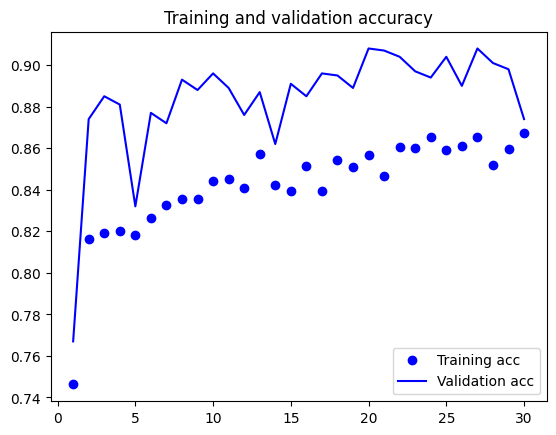

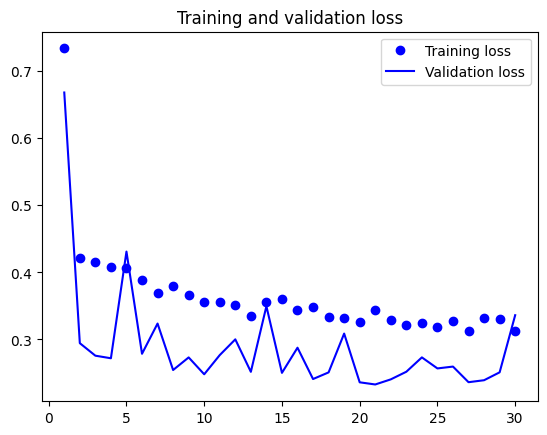

In [51]:
# plotting the results
import matplotlib.pyplot as plt

acc = history.history['acc']
val_acc = history.history['val_acc']

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(1, len(acc) + 1)

plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()
plt.figure()

plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()

# Notes
# -  you have reached a validation accuracy of about 90%

In [ ]:
# Using a pretrained convnet - fine-tuning
# Fine-tuning consists of unfreezing a few of the top layers of a frozen model base used for feature extraction,
# and jointly training both the newly added part of the model (in this case, the fully connected classifier) and these top layers.
# This is called fine-tuning because it slightly adjusts the more abstract representations of the model being reused, 
# in order to make them more rele- vant for the problem at hand.

# The steps for fine-tuning a network are as follow:
# - Add your custom network on top of an already trained base network
# - Freeze the base network
# - Train the part you added
# - Unfreeze some layers in the base network
# - Jointly train both these layers and the part you added

# Already completed the first three steps when doing feature extraction.

In [52]:
# See the base model
conv_base.summary()

Model: "vgg16"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 150, 150, 3)]     0         
                                                                 
 block1_conv1 (Conv2D)       (None, 150, 150, 64)      1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 150, 150, 64)      36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 75, 75, 64)        0         
                                                                 
 block2_conv1 (Conv2D)       (None, 75, 75, 128)       73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 75, 75, 128)       147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, 37, 37, 128)       0     

In [ ]:
# Fine-tune the last three convolutional layers, which means:
# - all layers up to block4_pool should be frozen
# - and the layers block5_conv1, block5_conv2, and block5_conv3 should be trainable
# So, it’s a good strategy to fine-tune only the top two or three layers in the convolutional base.

In [53]:
# Freezing all layers up to a specific one
conv_base.trainable = True
set_trainable = False

for layer in conv_base.layers:
    if layer.name == 'block5_conv1':
        set_trainable = True
    if set_trainable:
        layer.trainable = True
    else:
        layer.trainable = False

In [ ]:
# Now you can begin fine-tuning the network.
# Do this with the RMSProp optimizer, using a very low learning rate.
# The reason for using a low learning rate is that you want to limit 
# the magnitude of the modifications you make to the representations of the three layers you’re fine-tuning. 
# Updates that are too large may harm these rep- resentations.

In [54]:
# compile the model
model.compile(loss='binary_crossentropy',
              optimizer=optimizers.RMSprop(lr=1e-5),
              metrics=['acc'])

In [55]:
history = model.fit(train_generator,
                    steps_per_epoch=200,
                    epochs=100,
                    validation_data=validation_generator,
                    validation_steps=50)

Epoch 1/100


/var/folders/cg/xkrtyvkn46v_d07jqjh0zkp40000gn/T/ipykernel_57325/4124626419.py:1: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  history = model.fit_generator(train_generator,
2023-10-11 08:32:17.927412: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


200/200 [==============================] - ETA: 0s - loss: 48.1896 - acc: 0.5298

2023-10-11 08:32:35.019563: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


200/200 [==============================] - 21s 98ms/step - loss: 48.1896 - acc: 0.5298 - val_loss: 0.7495 - val_acc: 0.8120
Epoch 2/100
200/200 [==============================] - 20s 97ms/step - loss: 1.2224 - acc: 0.7488 - val_loss: 0.8505 - val_acc: 0.8240
Epoch 3/100
200/200 [==============================] - 20s 97ms/step - loss: 2.0652 - acc: 0.7413 - val_loss: 1.1462 - val_acc: 0.8190
Epoch 4/100
200/200 [==============================] - 20s 97ms/step - loss: 18.9110 - acc: 0.7205 - val_loss: 9.4920 - val_acc: 0.8560
Epoch 5/100
200/200 [==============================] - 19s 96ms/step - loss: 18.2098 - acc: 0.7793 - val_loss: 9.8481 - val_acc: 0.8440
Epoch 6/100
200/200 [==============================] - 20s 97ms/step - loss: 19.9799 - acc: 0.7835 - val_loss: 11.5939 - val_acc: 0.8900
Epoch 7/100
200/200 [==============================] - 19s 96ms/step - loss: 33.5515 - acc: 0.8000 - val_loss: 13.6575 - val_acc: 0.8960
Epoch 8/100
200/200 [==============================] - 19s 9

In [56]:
model.save('trained_models/cats_and_dogs_small_3.h5')

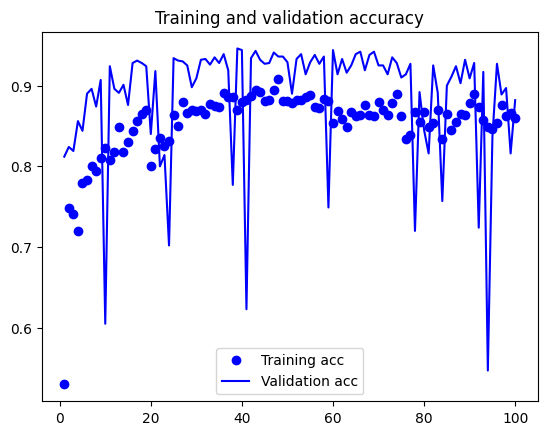

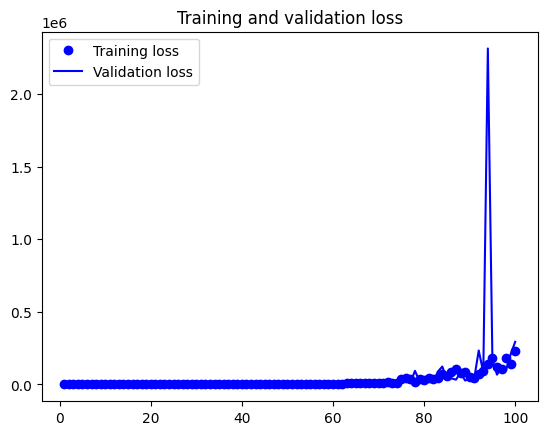

In [57]:
# plotting the results
import matplotlib.pyplot as plt

acc = history.history['acc']
val_acc = history.history['val_acc']

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(1, len(acc) + 1)

plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()
plt.figure()

plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()

# Notes
# -  you have reached a validation accuracy of about 90%

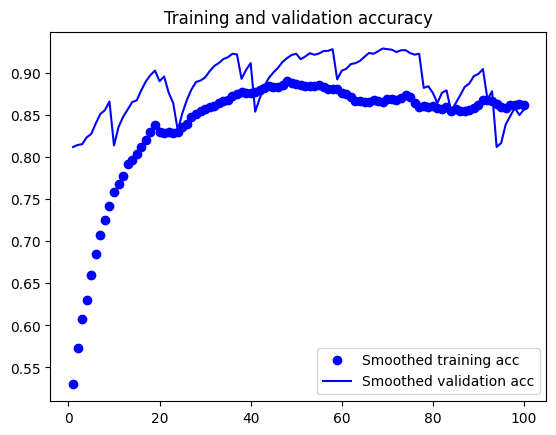

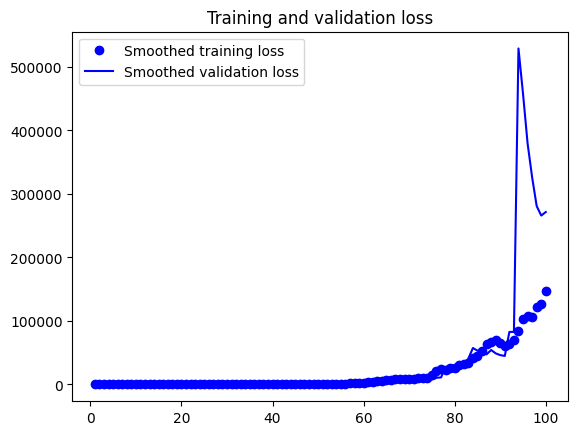

In [58]:
# These curves look noisy
# Smooth them by replacing every loss and accuracy with exponential moving averages of these quanti- ties.

def smooth_curve(points, factor=0.8):
  smoothed_points = []
  for point in points:
    if smoothed_points:
      previous = smoothed_points[-1]
      smoothed_points.append(previous * factor + point * (1 - factor))
    else:
      smoothed_points.append(point)
  return smoothed_points

plt.plot(epochs,
         smooth_curve(acc), 'bo', label='Smoothed training acc')
plt.plot(epochs,
         smooth_curve(val_acc), 'b', label='Smoothed validation acc')
plt.title('Training and validation accuracy')
plt.legend()
plt.figure()
plt.plot(epochs,
         smooth_curve(loss), 'bo', label='Smoothed training loss')
plt.plot(epochs,
         smooth_curve(val_loss), 'b', label='Smoothed validation loss')
plt.title('Training and validation loss')
plt.legend()
plt.show()

In [59]:
# Evaluate the model
test_generator = test_datagen.flow_from_directory(test_dir,
                                                  target_size=(150, 150),
                                                  batch_size=20,
                                                  class_mode='binary')

Found 1000 images belonging to 2 classes.


In [60]:
test_loss, test_acc = model.evaluate(test_generator, steps=50)
print('test loss:', test_loss)
print('test acc:', test_acc)

50/50 [==============================] - 3s 62ms/step - loss: 364199.4062 - acc: 0.8800
test loss: 364199.40625
test acc: 0.8800000548362732


In [64]:
# test generator
test_image_batch, test_label_batch = test_generator[30]
print(test_image_batch.shape)
print(test_label_batch.shape)
print(test_label_batch)

(20, 150, 150, 3)
(20,)
[1. 0. 1. 0. 0. 0. 0. 1. 0. 0. 0. 1. 1. 0. 1. 1. 1. 0. 0. 0.]


In [65]:
probs = model.predict(test_image_batch)
print(probs)

1/1 [==============================] - 0s 27ms/step
[[1.]
 [0.]
 [1.]
 [0.]
 [0.]
 [1.]
 [0.]
 [1.]
 [0.]
 [0.]
 [0.]
 [1.]
 [1.]
 [0.]
 [1.]
 [1.]
 [1.]
 [0.]
 [0.]
 [0.]]
